In [ ]:
from IPython.display import HTML
from IPython.display import display
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<style>
.border { border-width: 2px; border-color: black; border-style: solid; } 
</style>
''')
display(tag)

# Programming in Python II - Project
---

For this project, you have to provide the solutions for the following 3 questions. Code your answers directly into the cell after each question. Be sure to run them to ensure that your code works.
After you have filled up the answers, proceed back to where you downloaded this file to submit your solutions!

All the best!

---

## Question 1 - Advanced Python

### Given the following statements containing a list with 3 tuples (each tuple describes a book title, pages, and price):

In [ ]:
lst = [('Beginning iOS Programming', 534, 34.99), 
       ('Beginning Android Programming', 484, 29.99), 
       ('Python Machine Learning', 284, 39.99)]

### Using a lambda function, write the statement to sort the list of tuples based on:

### a. Book Title (alphabetical order)


In [ ]:
#---type your answer here---

import pandas as pd
df = pd.DataFrame(lst, columns=['Book Title', 'Number of Pages', 'Price']) #convert the list lst into a dataframe and assign columns 'Book Title', 'Pages', 'Price'
df.sort_values(by='Book Title') #sort in alphabetical order, ascending order by Book title

### b. Number of Pages (ascending order)

In [ ]:
#---type your answer here---
df.sort_values(by='Number of Pages') #sort in ascending order by Book title

### c. Price (descending order; i.e. most expensive to the cheapest)

In [ ]:
#---type your answer here---
df.sort_values(by='Price', ascending = False) #sort in descending order by Price

---

## Question 2 - NumPy

Given the following code:

In [ ]:
import numpy as np
a1 = np.round(20 * np.random.random((4,5)), 2)

### a. Print out the `a1` array.


In [ ]:
#---type your answer here---
a1

### b. Find and list out the mean of each row in the array


In [ ]:
#---type your answer here---
#compute mean for each rows, axis = 1, using the mean function of numpy array.
rowsOfMean = np.mean(a1, axis=1)
rowsOfMean

### c. In the `a1` array, find the number that is closest to the smallest mean.
<i>Hint: You will need to use a combination of numpy functions such as flat, abs, and argmin)</i>

In [ ]:
#---type your answer here---
a1.flat[np.abs(a1 - rowsOfMean.min()).argmin()] 

#explanation
#steps
#1 rowsOfMean.min() ,retrieves the min values of rowsofMean
#2 a1 - rowsOfMean.min() ,find the differences between each elements and the smallest min
#3 np.abs()  ,convert to absolute values, ignoring the signs, to find the smallest differences
#4 argmin()  ,returns the index of in the flatten array
#5 a1.flat[]   ,flatten the 2d array to a 1d array as the argmin function returns a flatten array

---

## Question 3 - Pandas

For this question, you are given the following dataset - <b>Automobile_data.csv</b>.

In [ ]:
import pandas as pd

df = pd.read_csv("Automobile_data.csv")

### a. Print the first 5 rows and the last 7 rows of the dataset, like this:
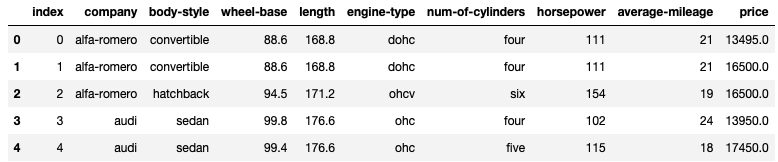
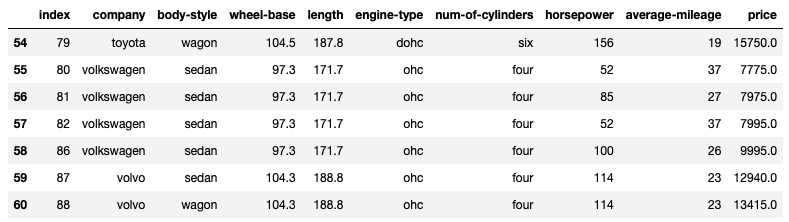

In [ ]:
#---type your answer here---
df.head() #print first 5 rows

In [ ]:
#---type your answer here---
df.tail(8) #print first 8 rows

### b. Find the company with the most expensive  car:

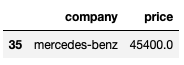

In [ ]:
#---type your answer here---
df.loc[[df['price'].idxmax()],['company','price']]

# Explanation:
# df['price'].idxmax(), returns index of max value following column 'price'
# df.loc[[],['company','price']], specifed the column 'company', 'price'
# df.loc[df['price'].idxmax(),['company','price'], returns datatype series
# ddf.loc[[df['price'].idxmax()],['company','price']],  returns datatype dataframe

### c. Write the statements to print out each company’s most expensive car:
<!-- 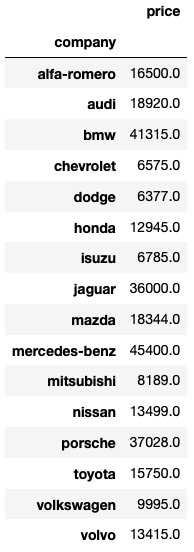 -->

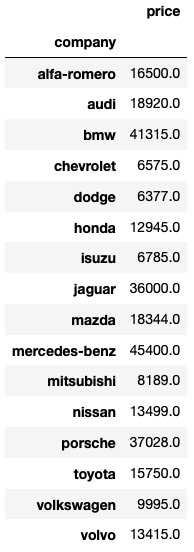

In [ ]:
#---type your answer here---
df[['price']].groupby(df['company']).max()

# Explanation:
# df['price'].groupby().max(), returns the max value
# df[['price']].groupby(df['company']).max(), returns each company with the max price, returns datatype series
# df[['price']].groupby(df['company']).max(), returns datatype dataframe

### d. Write the statements to print out the average mileage of each car maker:
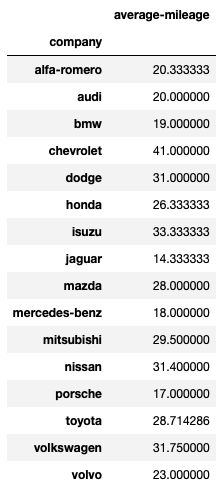

In [ ]:
#---type your answer here---
df[['price']].groupby(df['company']).mean()

# Explanation:
# df['price'].groupby().mean(), returns the  mean value
# df[['price']].groupby(df['company']).mean(), returns each company following its max price, returns datatype series
# df[['price']].groupby(df['company']).mean(), returns datatype dataframe

### e. For each car maker, print out the car maker’s name, and show the price of each car (from most expensive to cheapest), like this:

```
alfa-romero
-----------
hatchback $16500.0
convertible $16500.0
convertible $13495.0

audi
----
wagon $18920.0
sedan $17450.0
sedan $15250.0
sedan $13950.0

...

mercedes-benz
-------------
hardtop $45400.0
sedan $40960.0
wagon $28248.0
sedan $25552.0

mitsubishi
----------
sedan $8189.0
sedan $6989.0
hatchback $6189.0
hatchback $5389.0

...

volkswagen
----------
sedan $9995.0
sedan $7995.0
sedan $7975.0
sedan $7775.0

volvo
-----
wagon $13415.0
sedan $12940.0
```

#### Answer

#### Step1.  Extract source data

In [ ]:
# raw data
import pandas as pd
import numpy as np
df = pd.read_csv("Automobile_data.csv")
df

#### Step2. Data cleaning

In [ ]:
df = df.replace(np.nan,0) #replaced with zero for Null values
df

In [ ]:
df['price'] = '$' + df['price'].map(str) #format column 'price' with '$''
df

#### Step3. Data Extraction

In [ ]:
grouped_by_company = df.groupby('company')
for company, gp in grouped_by_company :
    #print(company)

    #print(type(gp.iloc[0]))
    print(company)
    print('-'*len(company))
    print(gp[['body-style','price']])
    print()   
    print('...')
    print()    


### f. You are tasked to create a program to help a user quickly extract rows of interest, up to two column names and their values. 

``` 
Hints: 
1) Create a function that accepts variable number of parameters
2) Prompt the user to enter the first column name (e.g., company)
3) Prompt the user to enter the first column value (e.g., dodge)
4) Prompt the user to enter the second column name (e.g., num-of-cylinders) 
(Note: if user enters 'exit', it indicates they only wish to search by the first column name and value)
5) Prompt the user to enter the second column value (e.g., six) (Only applicable if user doesn't enter 'exit' in the previous input.)
6) Call the function you have created in part 1 to display the result.

Note: In the above example, no results will be returned i.e., there are no dodge cars with six cyclinders.
```

In [ ]:
#---type your answer here---

verifyIntStr = lambda val :True  if (val.lower() == 'i' or val.lower() =='s') else False #verify integer or string
verifyNotSpecialChar_Null = lambda val :True  if val.strip() not in ('','!','@','$','#','%','^','*','(',')','-','+','=','_','<','>','?',':',';','{','}','[',']','|','-','&','~') else False #verify blanks and special characters

#verify integer for type i
def verifyInt(val):
        try:
            int(val)
            return value
        except ValueError:
            return False

def display(*dictX):
    
    list1 = []
    keydict ={}
    for x in dictX:
        list1.append(x)
    
    keydict = list1[2]
    
    print(list1[0], end = '')
    print(' has ', end = '')
    print(keydict['key1'], end = '')
    print(list1[1], end = '')
    print(' with ', end = '')
    print(keydict['key2'])
    
    
    
key1 = ''
key2 = ''
key1Type = ''
key2Type = ''
value1 = ''
value2 = ''

i = 0
dictA = dict()
list1 = []
list2 = []

while not verifyNotSpecialChar_Null(key1):
    key1 = input('Enter Key 1 : ')
while not verifyNotSpecialChar_Null(key2):
    key2 = input('Enter Key 2 : ')
while not verifyIntStr(key1Type):
    key1Type = input('Enter Key 1 Type \'s\'-string , \'i\'-int : ')
while not verifyIntStr(key2Type):
    key2Type = input('Enter Key 2 Type \'s\'-string , \'i\'-int : ')
    
while value1.lower() != 'exit' and value2.lower() != 'exit':

    value1 = input(f'Enter value for column [{key1}] : ')
    if value1 == 'exit':
        break
    list1.append(value1)
    print(list1)

        
    value2 = input(f'Enter value for column [{key2}] : ')
    if value2 == 'exit':
        break
    list2.append(value2)
    print(list2)
    
    
dictA.update(key1 = list1)    
dictA.update(key2 = list2)    

    
display(key1,key2,dictA)